In [172]:
pip install h5py



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\Dell pc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [179]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [224]:


# Load the train and test datasets from the .h5 files
train_data = h5py.File('train_catvnoncat.h5', 'r')
test_data = h5py.File('test_catvnoncat.h5', 'r')

# Extract the features and labels from the datasets
X_train = train_data['train_set_x'][:]
Y_train = train_data['train_set_y'][:]
X_test = test_data['test_set_x'][:]
Y_test = test_data['test_set_y'][:]

# Reshape the labels if necessary
Y_train = Y_train.reshape(( 1,Y_train.shape[0]))
Y_test = Y_test.reshape(( 1,Y_test.shape[0]))

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# Close the .h5 files
train_data.close()
test_data.close()
#print(np.squeeze(np.eye(2)[Y_train.reshape(-1)]))

X_train shape: (209, 64, 64, 3)
Y_train shape: (1, 209)
X_test shape: (50, 64, 64, 3)
Y_test shape: (1, 50)


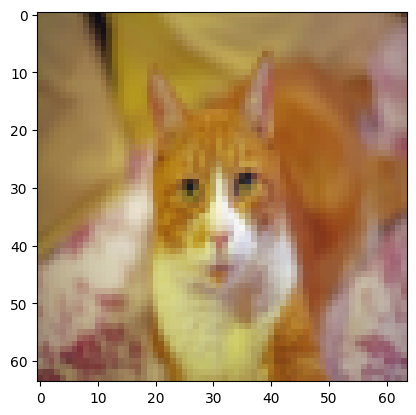

In [207]:
plt.imshow(X_train[24])

In [208]:
X_train_flatten =X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
print("X_train_flatten",X_train_flatten.shape)
print("X_test_flatten",X_test_flatten.shape)


X_train_flatten (12288, 209)
X_test_flatten (12288, 50)


In [209]:
X_train=X_train_flatten/255
X_test=X_test_flatten/255
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print(Y_train)


X_train shape: (12288, 209)
Y_train shape: (1, 209)
X_test shape: (12288, 50)
Y_test shape: (1, 50)
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


In [210]:
def initialize(n_x,n_h,n_y):
    np.random.seed(2)
    
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    parameters={"W1":W1,
               "b1":b1,
               "W2":W2,
               "b2":b2}
    return parameters
    
    

In [211]:
def ReLU(x):
    return x * (x > 0)
def ReLU_derivative(x):
    return (x>=0)

In [212]:
def forward_propagation(X,parameters):
    
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    
    
    
    Z1=np.dot(W1,X)+b1
    A1=ReLU(Z1)
    #A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2))
    #A2=np.tanh(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    #print("Z1",Z1.shape)
    #print("A1",A1.shape)
    #print("Z2",Z2.shape)
    #print("A2",A2.shape)


    return A2, cache
    
    
    
    
    

In [213]:
def compute_cost(A2, Y):
    
    
    
    m=Y.shape[1]
    
    cost=(-1/m)*(np.dot(Y, np.log(A2).T) + np.dot((1-Y), np.log(1-A2).T))
    
    cost = float(np.squeeze(cost)) 
    return cost
    
    

In [214]:
def back_propagation(X,Y,parameters,cache):
    m=X.shape[1]
    
    
    W1=parameters["W1"]
    W2=parameters["W2"]
    A1=cache["A1"]
    A2=cache["A2"]
    Z1=cache["Z1"]
    
    
    dZ2=A2-Y
    dW2=(1/m)*np.dot(dZ2,A1.T)
    db2=(1/m)*(np.sum(dZ2,axis=1,keepdims=True))
    dZ1=np.dot(W2.T,dZ2) * ReLU_derivative(Z1)
    #(1 - np.power(A1,2))
    #np.where(Z1 > 0, 1, 0)
    
    
    dW1=(1/m) *(np.dot(dZ1,X.T))
    db1=(1/m)*(np.sum(dZ1,axis=1,keepdims=True))
    
    grads={"dW2":dW2,
          "db2":db2,
          "dW1":dW1,
          "db1":db1}
#     print("dw1",dW1.shape)
#     print("dW2",dW2.shape)
    return grads
    
    

In [215]:
def update_parameters(parameters,grads,learning_rate):
    
    W1=parameters["W1"]
    W2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]
    
    
    
    dW1=grads["dW1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    db1=grads["db1"]
    
    
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
    
    parameters={"W1":W1,
               "W2":W2,
               "b1":b1,
               "b2":b2}
    return parameters
    

In [216]:
def train_model(X,Y, n_h, num_iterations = 10000, print_cost=False):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    
    
    parameters=initialize(n_x,n_h,n_y)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    
    
    for i in range(0,num_iterations):
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y)
        
        
        grads = back_propagation(X,Y,parameters,cache)
        
        parameters = update_parameters(parameters, grads, 0.01)#0.005
        
        
        
        if i%1000==0:
            print("cost after",i,"iteration is",cost)
            
            
    return parameters,cost

In [222]:
parameters,cost=train_model(X_train,Y_train,5 , num_iterations = 10000, print_cost=True)

m=X_train[1]

print("The cost after 10000 iterations is ",cost)

#16

cost after 0 iteration is 0.6921933809843939
cost after 1000 iteration is 0.21370011210901124
cost after 2000 iteration is 0.03751352807480514
cost after 3000 iteration is 0.013921322197464843
cost after 4000 iteration is 0.007615431269459852
cost after 5000 iteration is 0.005018859812557243
cost after 6000 iteration is 0.0036603838653502204
cost after 7000 iteration is 0.002843387975380608
cost after 8000 iteration is 0.002305867231998943
cost after 9000 iteration is 0.0019278931853315636
The cost after 10000 iterations is  0.0016490497258470605


In [221]:
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]




Z1=np.dot(W1,X_test)+b1
A1=np.maximum(0,Z1)
Z2=np.dot(W2,A1)+b2
A2=1/(1+np.exp(-Z2))



print(A2)
predictions = (A2 > 0.5)
print(predictions)

[[9.91970389e-01 6.58000302e-01 9.99186463e-01 9.99535022e-01
  9.85713477e-01 2.42559937e-01 5.39461827e-06 9.83578702e-01
  9.95428202e-01 9.42160259e-01 1.02978865e-01 1.56844040e-01
  8.59537145e-01 9.99187521e-01 1.39679873e-06 9.99451432e-01
  2.47449461e-03 9.98973525e-01 1.56413668e-04 1.12914172e-05
  9.99470754e-01 2.88417055e-02 1.58538569e-07 9.98515339e-01
  6.43638802e-01 8.18579323e-01 9.76212161e-01 1.85194852e-06
  1.56672921e-05 2.08143546e-01 1.43150321e-03 9.50909920e-01
  9.69667078e-01 7.09925713e-01 3.05413566e-01 5.76652854e-04
  1.18815552e-03 8.97780586e-01 1.40414531e-01 2.35981783e-03
  2.27354560e-01 2.48287656e-04 9.56311199e-01 1.18599576e-05
  9.98953390e-01 9.91742759e-01 6.44348800e-03 9.98600067e-01
  9.62890031e-01 1.69359360e-03]]
[[ True  True  True  True  True False False  True  True  True False False
   True  True False  True False  True False False  True False False  True
   True  True  True False False False False  True  True  True False False


Your model predicted a Cat ==> True


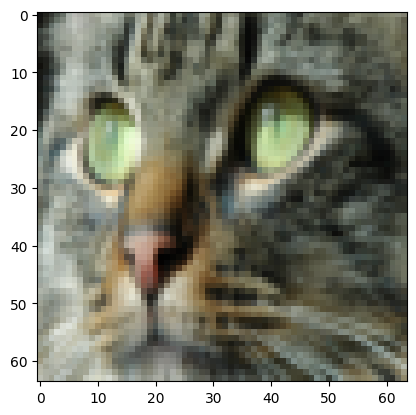

In [227]:
index=48
plt.imshow(X_test[index])
if predictions[0][index]==True:
    print("Your model predicted a Cat ==>",predictions[0][index])
elif predictions[0][index]==False:
    print("Your model predicted not a Cat ==>",predictions[0][index])
    
